In [27]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载字体
font = FontProperties(fname='/Library/Fonts/Songti.ttc', size=18)
# 年份
year = '2015年'
# 加载数据
tax_data = pd.read_csv('国家各项税收.csv', index_col=0, skiprows=2, skipfooter=1, engine='python')

tax_data

,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年
指标,,,,,,,,,,
各项税收(亿元),124922.20,119175.31,110530.70,100614.28,89738.39,73210.79,59521.59,54223.79,45621.97,34804.35
国内增值税(亿元),31109.47,30855.36,28810.13,26415.51,24266.63,21093.48,18481.22,17996.94,15470.23,12784.81
营业税(亿元),19312.84,17781.73,17233.02,15747.64,13679.00,11157.91,9013.98,7626.39,6582.17,5128.71
国内消费税(亿元),10542.16,8907.12,8231.32,7875.58,6936.21,6071.55,4761.22,2568.27,2206.83,1885.69
关税(亿元),2560.84,2843.41,2630.61,2783.93,2559.12,2027.83,1483.81,1769.95,1432.57,1141.78
个人所得税(亿元),8617.27,7376.61,6531.53,5820.28,6054.11,4837.27,3949.35,3722.31,3185.58,2453.71
企业所得税(亿元),27133.87,24642.19,22427.20,19654.53,16769.64,12843.54,11536.84,11175.63,8779.25,7039.60


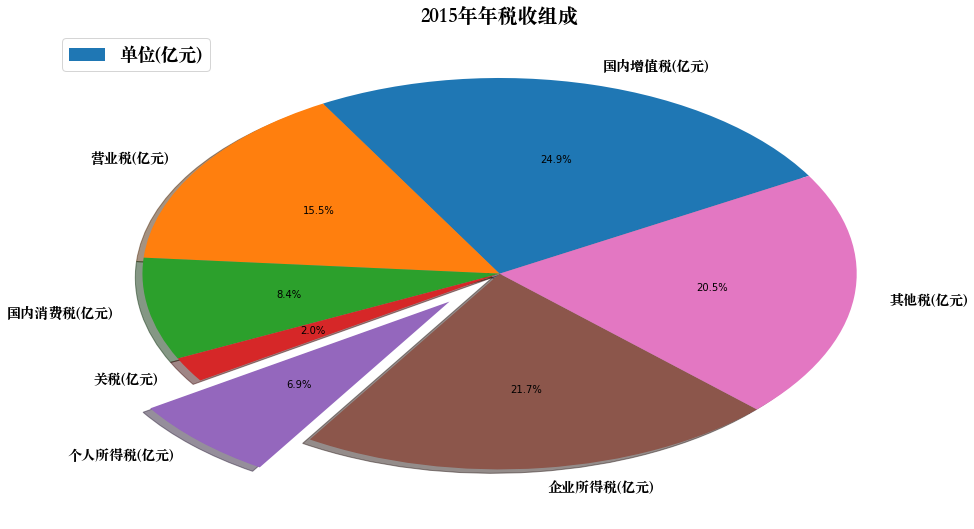

In [28]:
# 计算其他税收
other_tax = tax_data[year].iloc[0] - tax_data[year].iloc[1:].sum()

# 绘制饼图
all_tax_data = pd.concat([tax_data[year][1:], Series([other_tax], index=['其他税(亿元)'])])

# 将个人所得税分离显示
explode = [0.2 if tax_name == '个人所得税(亿元)' else 0 for tax_name in all_tax_data.index]

# 设置图片大小
plt.figure(figsize=(16, 9))

my_pie = plt.pie(all_tax_data, 
                 labels=all_tax_data.index, 
                 shadow=True, 
                 autopct='%1.1f%%', 
                 explode=explode, 
                 startangle=30)

# 设置饼图显示字体为中文
for txt in my_pie[1]:
    txt.set_fontproperties(font)
    txt.set_fontsize(14)

# 显示图例
plt.legend(['单位(亿元)'], loc=2, prop=font)
plt.title('%s年税收组成' % year, fontproperties=font, fontsize=20)
    
plt.show()